# 第4章: 形態素解析
https://nlp100.github.io/ja/ch04.html

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
# !wget https://nlp100.github.io/data/neko.txt && mv neko.txt ../dataset/
text_file_path = '../dataset/neko.txt'
!mecab -d /etc/alternatives/mecab-dictionary < {text_file_path} > neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．


In [1]:
from pprint import pprint

with open('neko.txt.mecab', 'r') as f:
    lines = f.read().split('\n')

# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
result = []
for line in lines:
    if line == 'EOS' or line == '':
        continue
    surface, content = line.split('\t')
    content = content.split(',')
    base, pos, pos1 = content[6], content[0], content[1]
    map_dict = {'surface': surface, 'base': base, 'pos': pos, 'pos1': pos1}
    result += [map_dict]

pprint(result[:10])

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]


## 31. 動詞
動詞の表層形をすべて抽出せよ．


In [11]:
surfaces_verb = [map_dict['surface'] for map_dict in result if map_dict['pos'] == '動詞']
pprint(surfaces_verb[:10])

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．


In [13]:
bases_verb = [map_dict['base'] for map_dict in result if map_dict['pos'] == '動詞']
pprint(bases_verb[:10])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．


In [18]:
for i in range(1, len(result)-1):
    if result[i]['surface'] == 'の' and result[i-1]['pos'] == result[i+1]['pos'] == '名詞':
        print(result[i-1]['surface']+"の"+result[i+1]['surface'])
        if i > 1000:
            break

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


In [64]:
max_words = ''
current_words = ''
for map_dict in result:
    surface, pos = map_dict['surface'], map_dict['pos']
    if pos == '名詞':
        current_words += surface
        if len(max_words) < len(current_words):
            max_words = current_words
    else:
        current_words = ''
print(max_words)


manyaslip'twixtthecupandthelip


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．


In [10]:
from collections import Counter
surfaces = [map_dict['surface'] for map_dict in result]
words_frequency = Counter(surfaces).most_common()
words_frequency[:10]

[('', 9964),
 ('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337)]

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


<BarContainer object of 10 artists>

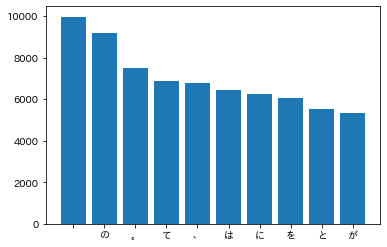

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

words, frequency = [ele[0] for ele in words_frequency[:10]], [ele[1] for ele in words_frequency[:10]]
plt.bar(words, frequency)

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


<BarContainer object of 10 artists>

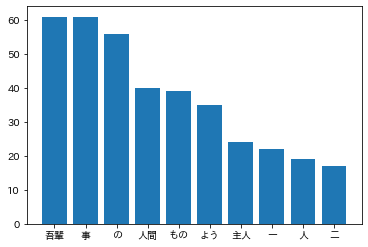

In [20]:
# 文ごとに分ける
sentences = []
sentence = []
for map_dict in result:
    surface = map_dict['surface']
    sentence += [map_dict]
    if surface == '。':
        sentences += [sentence]
        sentence = []

# 猫が含まれる文の中で出現する名詞の数をカウント
words_list = []
for sentence in sentences:
    words = [map_dict['surface'] for map_dict in sentence if map_dict['pos'] == '名詞']
    if '猫' in words:
        words_list += filter(lambda x: x not in ['猫'], words)

# 子猫
co_neko_freqency = Counter(words_list).most_common()[:10]
words, frequency = [ele[0] for ele in co_neko_freqency[:10]], [ele[1] for ele in co_neko_freqency[:10]]
plt.bar(words, frequency)
plt.show()


## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．


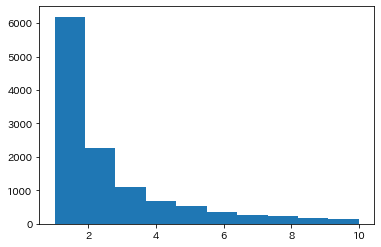

In [74]:
frequency = [ele[1] for ele in words_frequency]
plt.hist(frequency, bins=10, range=(1,10))
plt.show()


## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

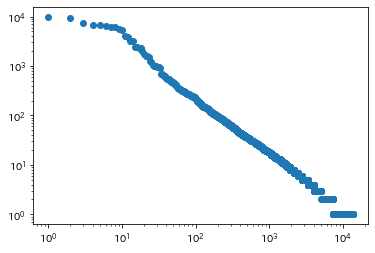

In [76]:
rank = range(1, len(frequency)+1)
plt.loglog(rank, frequency, "o")
plt.show()